###### Bulgaria Employment Trends 
[Go back to the main page](./../Bulgaria_Employment_Trends.ipynb)

---------

## Python Jobs Word Cloud


----------
### Introduction

- Objectives: 
 - Show how searching the offer title is not enough to determine the real demand for python specialists.


### Methodology


In [1]:
import psycopg2
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

from nbstyler import STYLE

%matplotlib notebook
%matplotlib inline

In [2]:
conn = psycopg2.connect("dbname=jobsbg")
cur = conn.cursor()
cur.execute('SELECT jobs.name FROM jobs WHERE jobs.id IN (SELECT * FROM mv_job_ids_python_contents);')

result = cur.fetchall()
cur.close()
conn.close()

In [3]:
wc = WordCloud(background_color = STYLE['colors']['solid']['bg1'], max_words=2000, max_font_size=300, random_state=42)

In [4]:
jobs_text = ''.join(job_name[0] for job_name in result)

In [5]:
wc.generate_from_text(jobs_text)

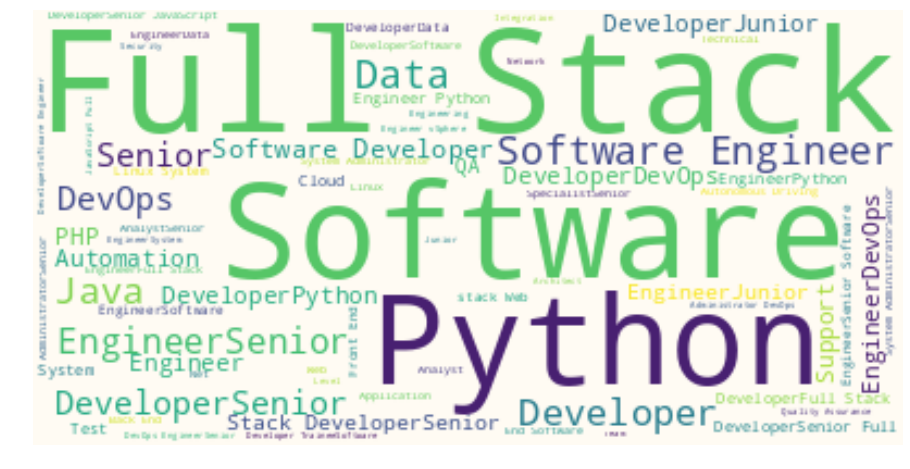

In [7]:
plt.figure(figsize = (16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()